In [1]:
import pandas as pd

# Read data
data = pd.read_csv('SAT_GPA.csv')
pd.DataFrame(data)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data[['SAT']]
y = data['GPA']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.357, random_state=2)

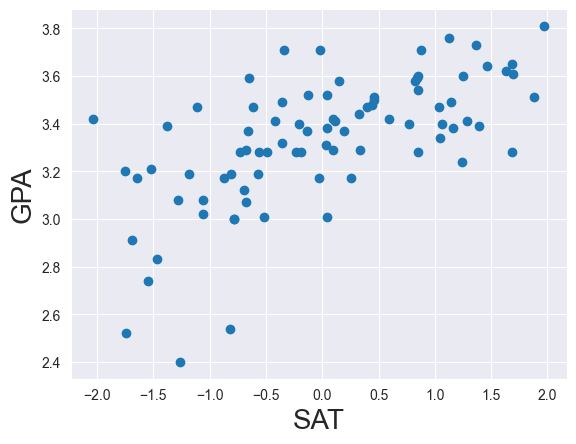

In [3]:
from matplotlib import pyplot as plt

# Visualize
plt.scatter(X,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()



# MLP Regression

In [15]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time
# MLP Regression model
start_time_mlp = time.time()
mlp = MLPRegressor(solver='adam', hidden_layer_sizes=(30,),
                        activation= 'relu', max_iter=3000, random_state=2)
mlp.fit(X_train, y_train)
end_time_mlp = time.time()

time_training = end_time_mlp - start_time_mlp
print("Time training of MLP Regression model: ", time_training)

# Prediction
y_pred = mlp.predict(X_test)
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of ANN Regression:", mse)
# R2-Squared
r2 = r2_score(y_test, y_pred)
print("R2-Score of ANN Regression:", r2)

Time training of MLP Regression model:  0.13007521629333496
Mean Squared Error of ANN Regression: 0.11761055767715342
R2-Score of ANN Regression: -0.3389705110051382


In [22]:
# Measure Predict Time
predict_times_mlp = []
for i in range(100):  
    start_time_predict_mlp = time.time()
    y_pred_mlp = mlp.predict(X_test)
    end_time_predict_mlp = time.time()
    predict_times_mlp.append(end_time_predict_mlp - start_time_predict_mlp)

# Average Time
avg_time_predict_mlp = sum(predict_times_mlp) / len(predict_times_mlp)
print("Average time of MLP prediction: ", avg_time_predict_mlp)


Average time of MLP prediction:  0.00013031721115112305


# LINEAR REGRESSION

In [18]:
from sklearn.linear_model import LinearRegression

# Linear Regression model
start_time_lr = time.time()
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
end_time_lr = time.time()

time_training_lr = end_time_lr - start_time_lr
print("Time training of Linear Regression model: ", time_training_lr)

# Prediction
y_pred = lr.predict(X_test)
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of Linear Regression:", mse)
# R2-Squared
r2 = r2_score(y_test, y_pred)
print("R2-Score of Linear Regression:", r2)


Time training of Linear Regression model:  0.0071218013763427734
Mean Squared Error of Linear Regression: 0.05098359334283457
R2-Score of Linear Regression: 0.41956292547710317


Thời gian training:
- Linear Regression: Thời gian rất nhanh (0.0071 giây), cho thấy mô hình LR có thể được huấn luyện rất nhanh chóng và hiệu quả, điều này phù hợp với tính chất đơn giản của nó.
- MLP Regression: Thời gian đào tạo dài hơn (0.1301 giây). MLP là một mô hình phức tạp hơn nhiều so với LR, do đó, thời gian đào tạo của nó cũng sẽ lâu hơn.

Mean Squared Error (MSE):

- Linear Regression: MSE thấp hơn (0.0510), cho thấy mô hình LR đã dự đoán tốt hơn, khá gần với giá trị thực.
- MLP Regression: MSE cao hơn (0.1176), cho thấy mô hình MLP không dự đoán chính xác bằng mô hình LR trong trường hợp này. MSE của MLP cao hơn cho thấy độ sai lệch lớn hơn giữa giá trị dự đoán và giá trị thực.

R2-Score:

- Linear Regression: R2-Score dương (0.4196), cho thấy mô hình LR có khả năng giải thích khoảng 41.96% phương sai của dữ liệu. Đây là một chỉ số tương đối khá cho các mô hình hồi quy.
- MLP Regression: R2-Score âm (-0.3390), cho thấy mô hình MLP thực sự không chỉ kém hiệu quả mà còn có thể không phù hợp với dữ liệu. Điều này có thể chỉ ra rằng mô hình MLP chưa được tối ưu hóa tốt, có thể do vấn đề với việc lựa chọn tham số, cấu trúc mạng, hoặc do mô hình quá phức tạp cho tập dữ liệu nhỏ.

In [20]:
# Measure Predict Time
predict_times_lr = []
for i in range(100):
    start_time_predict_lr = time.time()
    y_pred_lr = lr.predict(X_test)
    end_time_predict_lr = time.time()
    predict_times_lr.append(end_time_predict_lr - start_time_predict_lr)

# Average Time
avg_time_predict_mlp = sum(predict_times_lr) / len(predict_times_lr)
print("Average time of LR prediction: ", avg_time_predict_mlp)

Average time of LR prediction:  5.4187774658203125e-05


- Linear Regression có thời gian dự đoán nhanh hơn MLP, điều này có thể là do LR là một mô hình đơn giản hơn với ít tham số hơn cần phải tính toán.
- MLP, mặc dù có thời gian dự đoán vẫn ở mức chấp nhận được, nhưng thời gian dự đoán của nó cao hơn so với LR. Điều này cũng là điều thường thấy, bởi vì MLP thường cần thực hiện nhiều phép toán hơn để tính toán đầu ra do cấu trúc mạng phức tạp hơn.

In [30]:
# MLP Regression model
mlp_one= MLPRegressor(solver='adam', hidden_layer_sizes=(75,),
                            activation= 'relu', max_iter=3000, random_state=2)
mlp_one.fit(X_train, y_train)
    
# Prediction
y_pred_one = mlp_one.predict(X_test)
# Mean Squared Error
mse_one = mean_squared_error(y_test, y_pred_one)
print("Mean Squared Error of ANN Regression(75 neurons):", mse_one)
# R2-Squared
r2_one = r2_score(y_test, y_pred_one)
print("R2-Score of ANN Regression(75 neurons):", r2_one)
    

Mean Squared Error of ANN Regression(75 neurons): 0.09972602960500421
R2-Score of ANN Regression(75 neurons): -0.1353590651893073


In [31]:
# MLP Regression model
mlp_two= MLPRegressor(solver='adam', hidden_layer_sizes=(50,),
                            activation= 'relu', max_iter=3000, random_state=2)
mlp_two.fit(X_train, y_train)
    
# Prediction
y_pred_two = mlp_two.predict(X_test)
# Mean Squared Error
mse_two = mean_squared_error(y_test, y_pred_two)
print("Mean Squared Error of ANN Regression(50 neurons):", mse_two)
# R2-Squared
r2_two = r2_score(y_test, y_pred_two)
print("R2-Score of ANN Regression(50 neurons):", r2_two)
    

Mean Squared Error of ANN Regression(50 neurons): 0.11907915863526064
R2-Score of ANN Regression(50 neurons): -0.3556902121457224


MỐI QUAN HỆ GIỮA SIÊU THAM SỐ VÀ CÁC KẾT QUẢ DỰ ĐOÁN

- Mô hình với 75 nơ-ron có khả năng học tốt hơn các đặc trưng từ dữ liệu, dẫn đến MSE thấp hơn và R2-Score cao hơn so với mô hình với 50 nơ-ron. Điều này có thể cho thấy rằng mô hình có khả năng xử lý và biểu diễn các mối quan hệ phức tạp hơn trong dữ liệu.
- Điều này nhấn mạnh tầm quan trọng của việc điều chỉnh siêu tham số trong quá trình phát triển mô hình để tối ưu hóa hiệu suất dự đoán.
